In [1]:
%load_ext autoreload


In [2]:
%autoreload 2


In [3]:
import crawto.ml_analysis as ca
import pandas as pd
import missingno as msno
db_name = "test.db" 
problem = "classification" 
target = "Survived" 


In [4]:
untransformed_df, imputed_df,transformed_df,train_target_column, valid_target_column = ca.load_dfs(db_name)


In [5]:
df_list = {"untransformed":untransformed_df,"imputed":imputed_df,"transformed":transformed_df}


In [6]:
numeric_features, categoric_features = ca.get_feature_lists(db_name)

In [7]:
ca.nan_report(untransformed_df)


,Percent of data encoded NAN
Cabin,77.25
Age,19.01
Embarked,0.30
PassengerId,0.00
Survived,0.00
Pclass,0.00
Name,0.00
Sex,0.00
SibSp,0.00
Parch,0.00


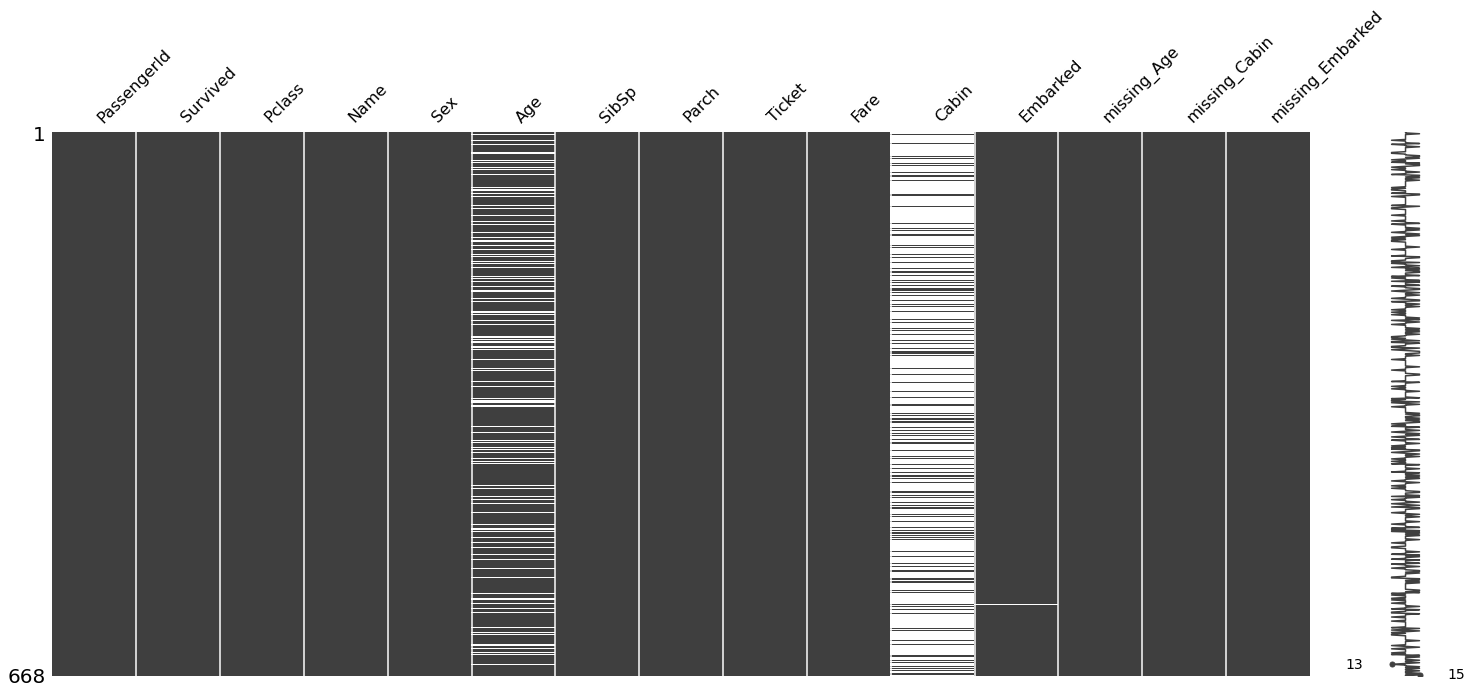

In [8]:
msno.matrix(untransformed_df)


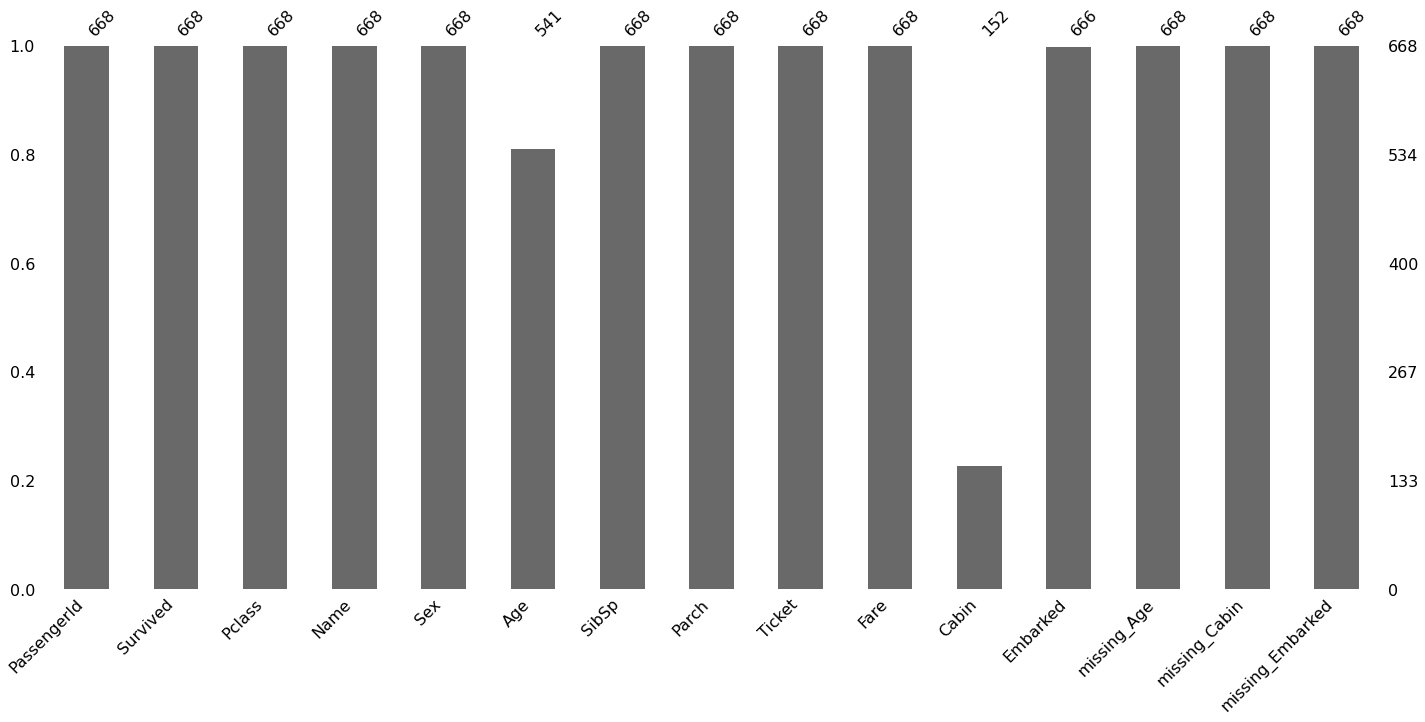

In [9]:
msno.bar(untransformed_df)


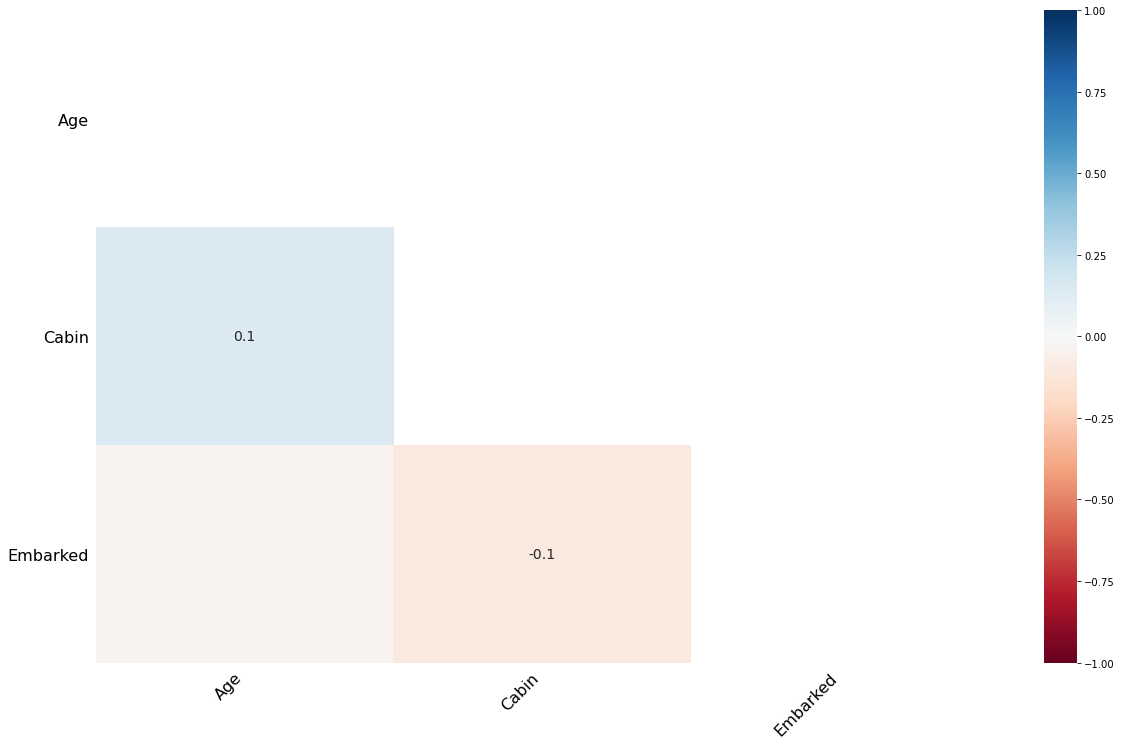

In [10]:
msno.heatmap(untransformed_df)


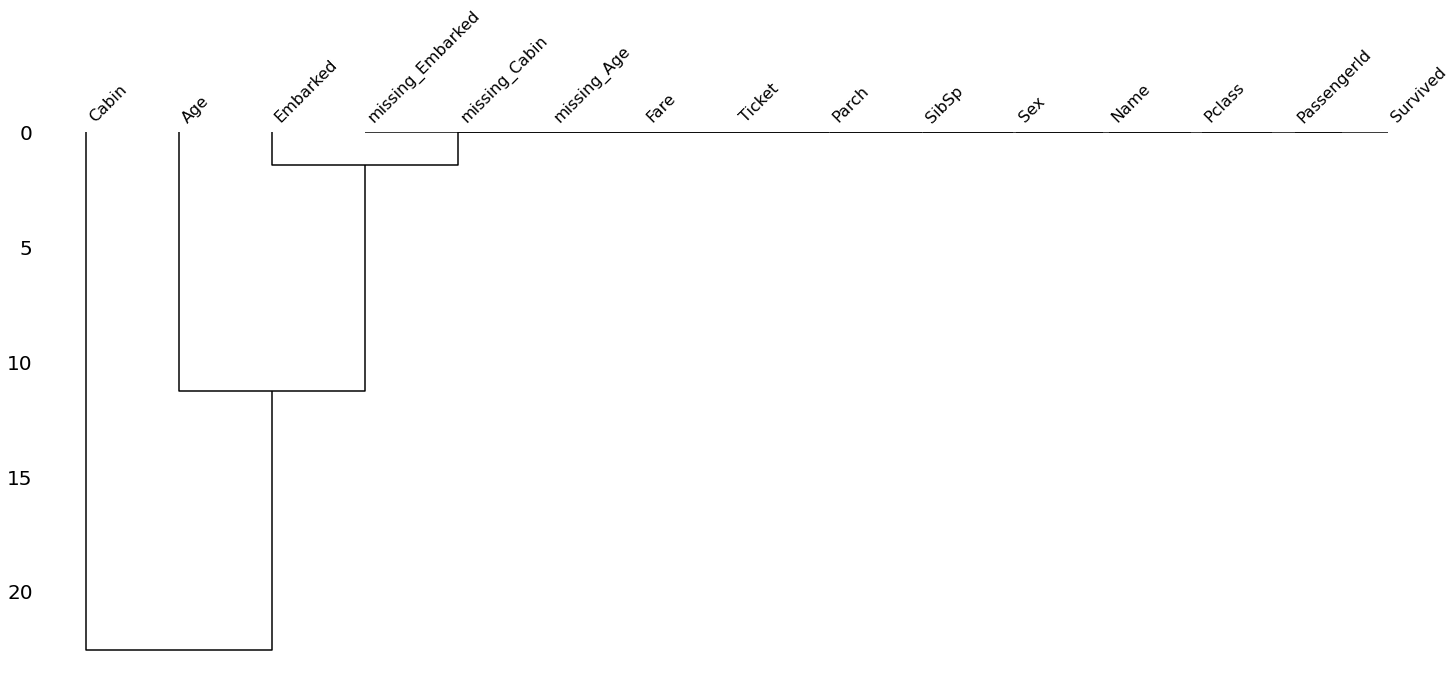

In [11]:
msno.dendrogram(untransformed_df)


In [12]:
ca.skew_report(untransformed_df)


There are 1 highly skewed data columns.
Please check them for miscoded na's
['Fare']


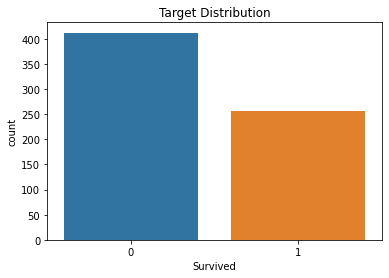

In [13]:
ca.target_distribution_report(problem=problem,df=untransformed_df,target=target)


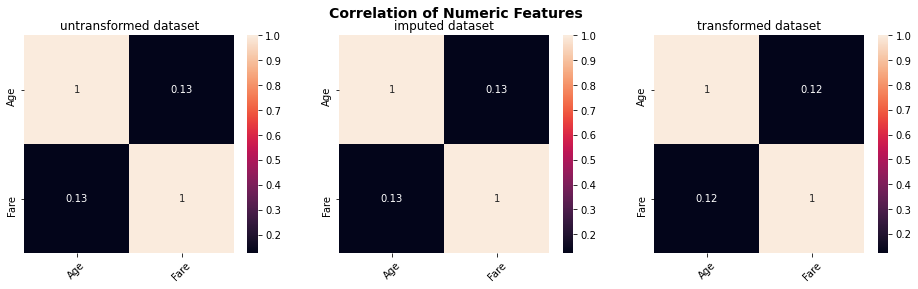

In [14]:
ca.correlation_report(df_list,numeric_features,db_name)


e:\projects\crawto\.venv\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
e:\projects\crawto\.venv\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
e:\projects\crawto\.venv\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


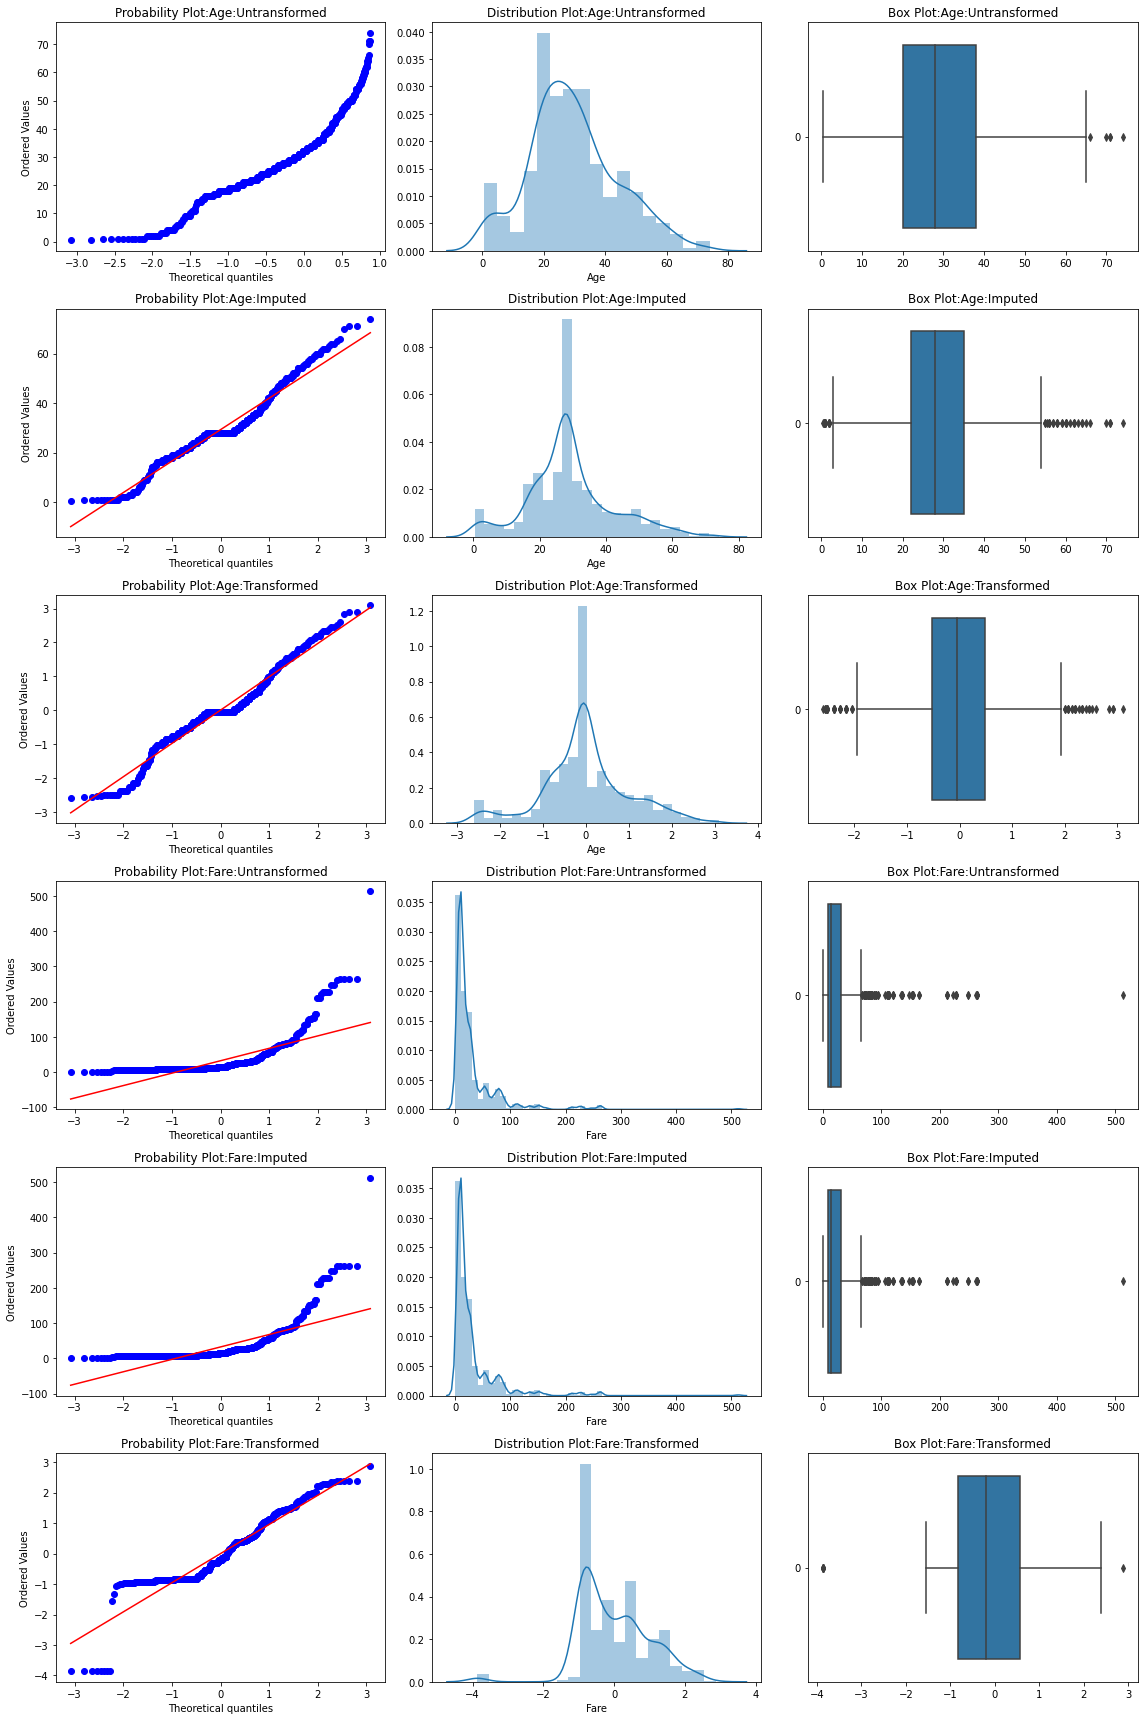

In [15]:
ca.probability_plots(numeric_features,df_list)


In [16]:
ca.distribution_r(df_list,numeric_features,target)


,Shapiro-Wilks_Test_Statistic,Shapiro-Wilks_p_Value,Normal distribution ?
Age,NaN,1.000000e+00,True
Fare,0.566353,1.216136e-37,False


,Shapiro-Wilks_Test_Statistic,Shapiro-Wilks_p_Value,Normal distribution ?
Age,0.956134,3.215172e-13,False
Fare,0.566353,1.216136e-37,False


,Shapiro-Wilks_Test_Statistic,Shapiro-Wilks_p_Value,Normal distribution ?
Age,0.961960,3.848638e-12,False
Fare,0.909793,1.835677e-19,False


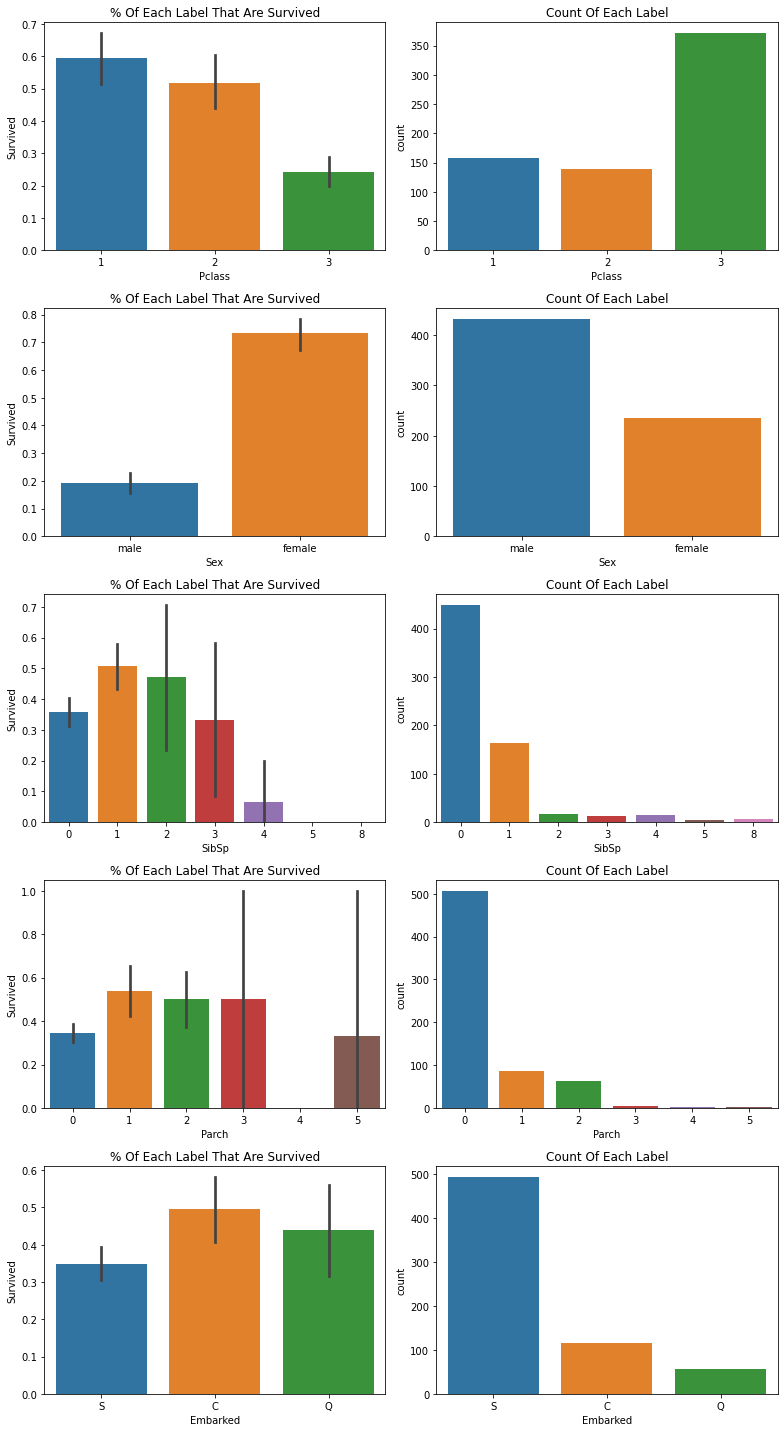

In [17]:
ca.categorical_bar_plots(categorical_features=categoric_features,target=target,data=untransformed_df)


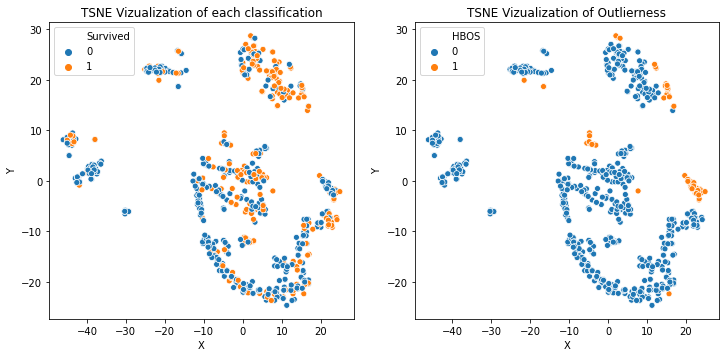

In [18]:
ca.tsne_viz(transformed_df,train_target_column,target,problem)


e:\projects\crawto\.venv\lib\site-packages\numba\np\ufunc\parallel.py:355: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 11000. The TBB threading layer is disabled.
  warnings.warn(problem)


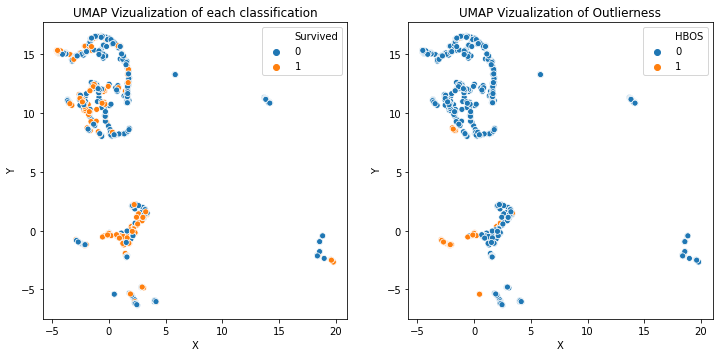

In [19]:
ca.umap_viz(transformed_df,train_target_column,target,problem)


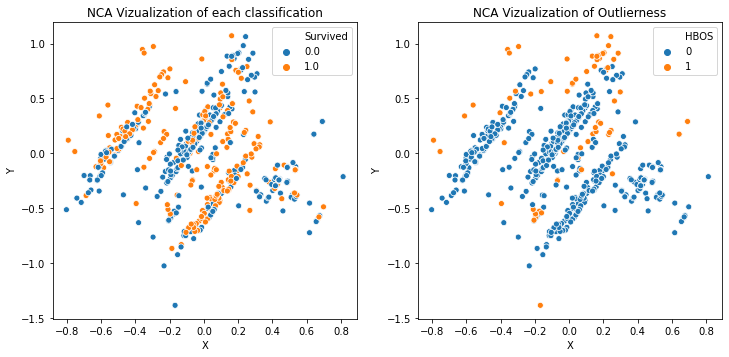

In [20]:
ca.nca_viz(transformed_df,train_target_column,target,problem)


e:\projects\crawto\.venv\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


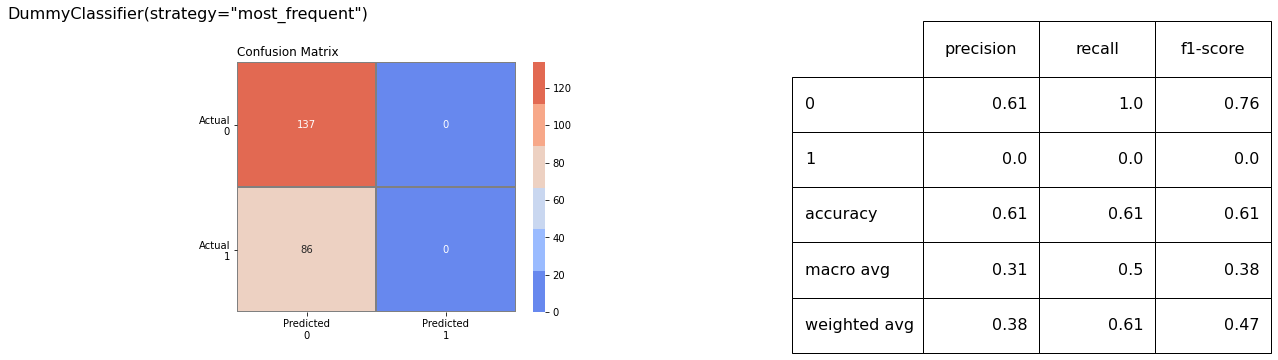

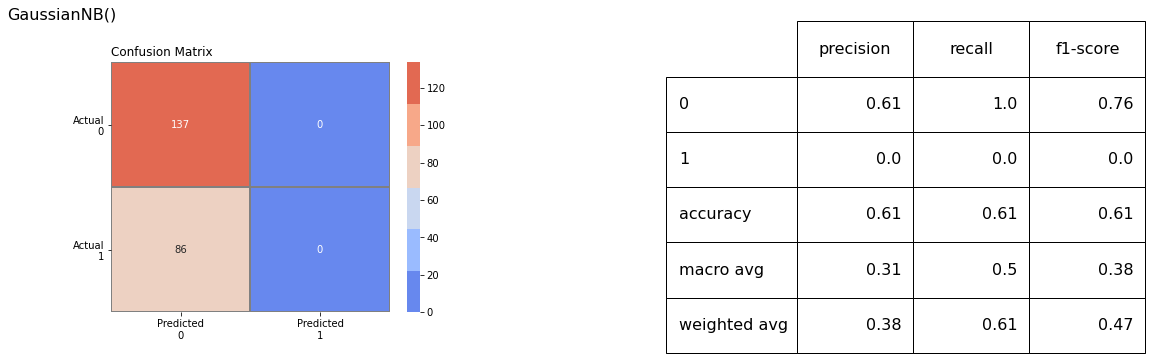

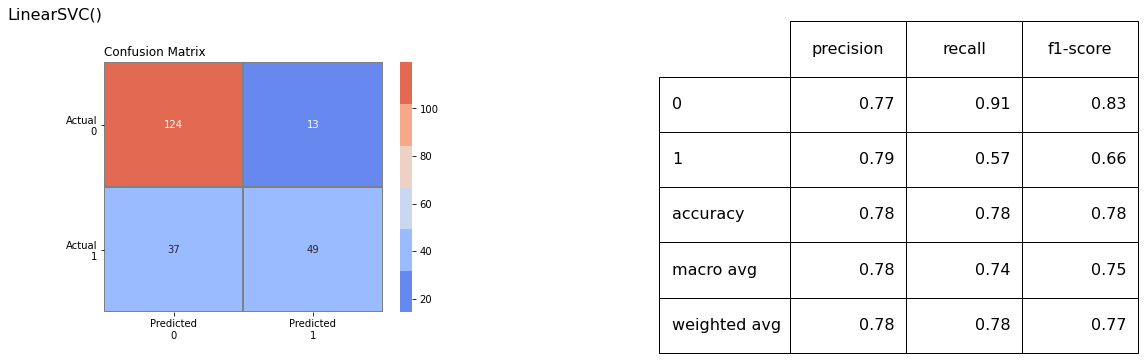

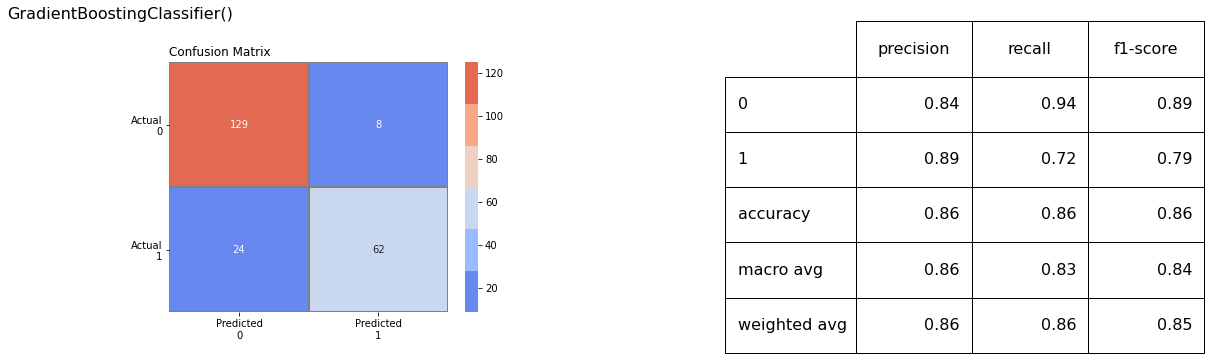

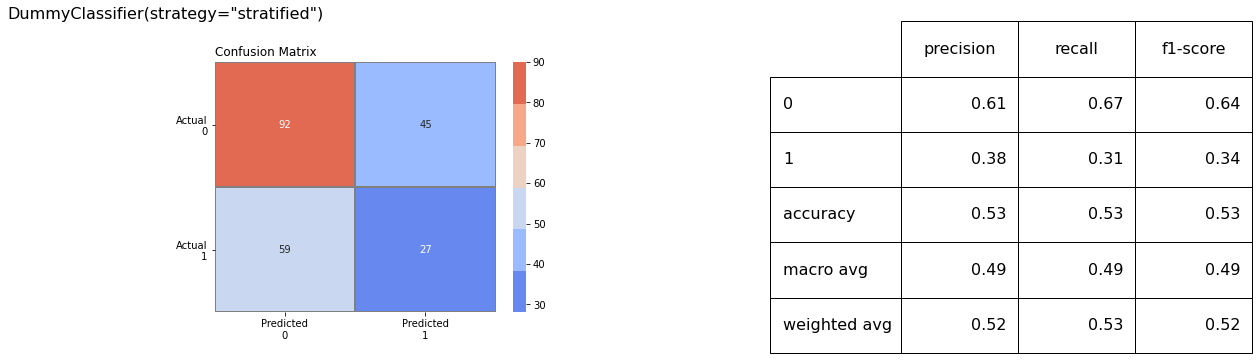

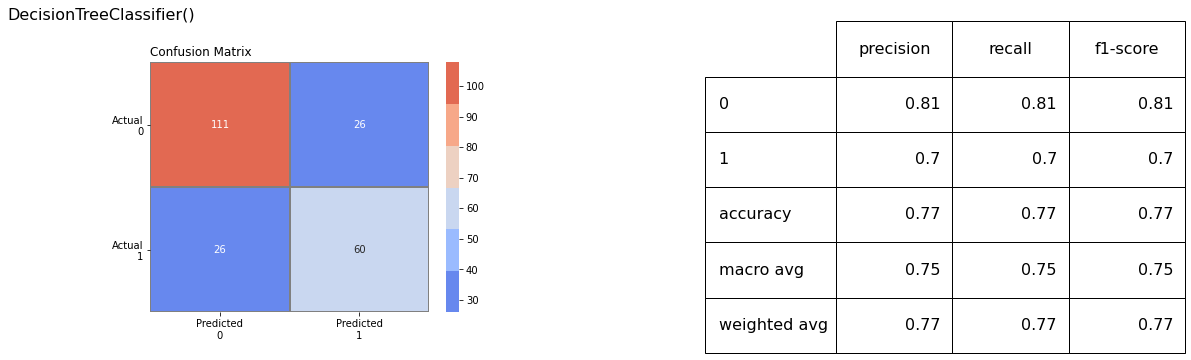

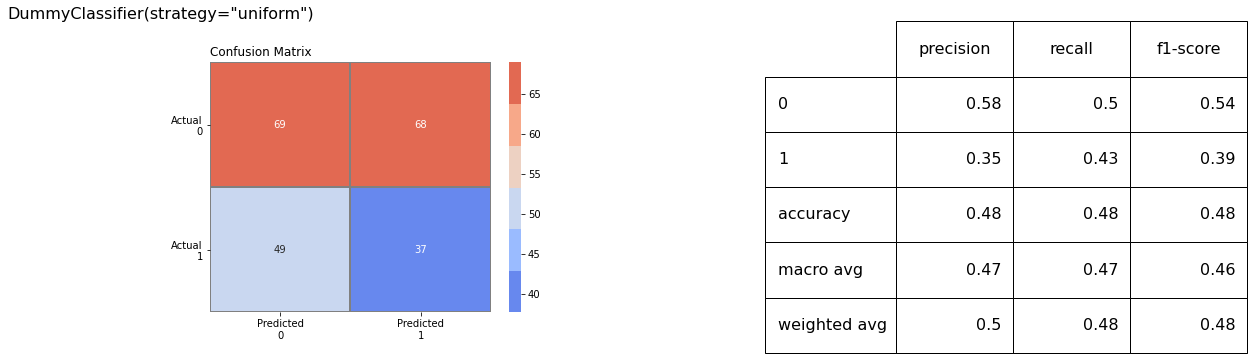

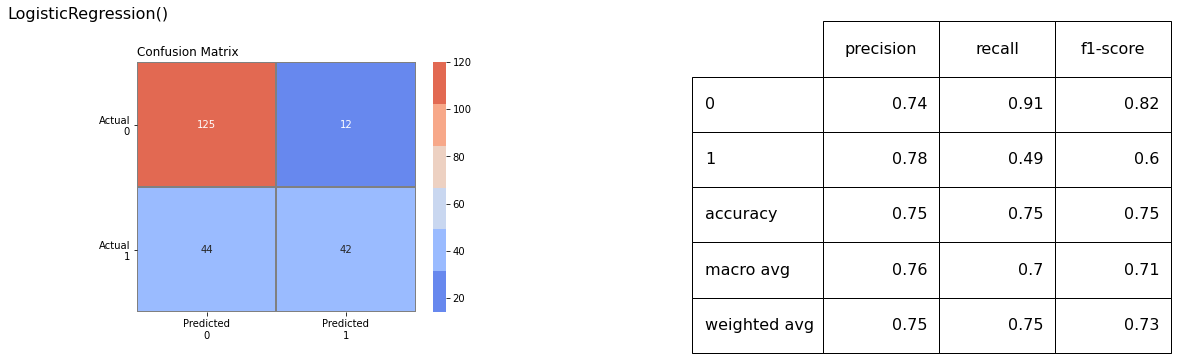

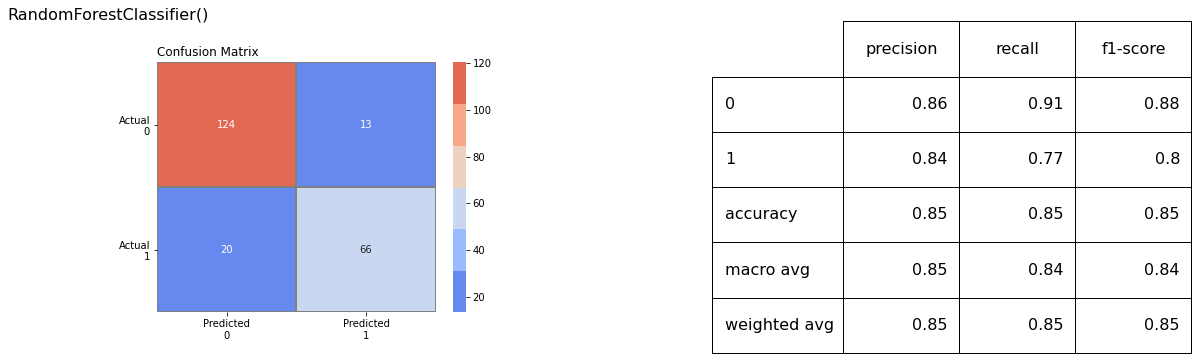

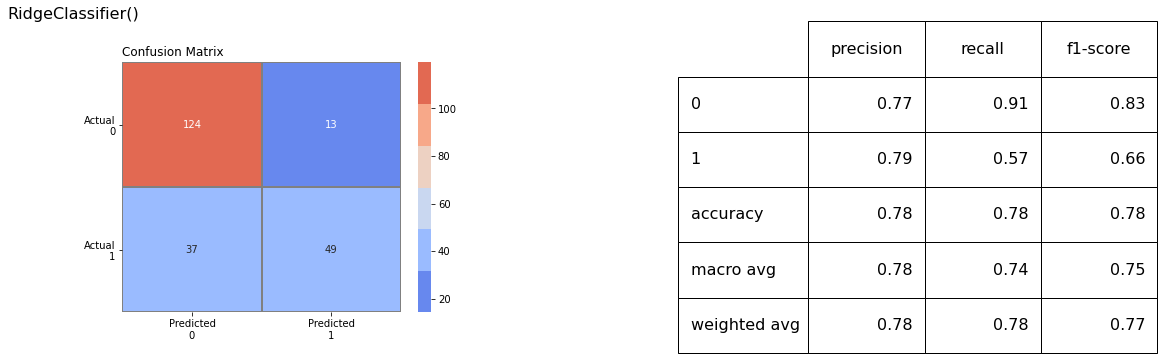

In [21]:
ca.model_viz(db_name,valid_target_column)
